# Objective
* here our objective is to predict positives correctly which is more important because if my model predicted positive as negative then we will not send Advertisement mail to our customer(who responds to email advertisements) so we loose Business
* So in our case presision is important Scoring metric

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from numpy import set_printoptions
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2,f_classif
from sklearn.preprocessing import StandardScaler,MinMaxScaler
from sklearn.model_selection import GridSearchCV,RandomizedSearchCV,train_test_split,cross_val_score
from sklearn.metrics import classification_report,roc_auc_score
import statsmodels.api as sm
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier
from xgboost import XGBClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from joblib import dump

In [2]:
df = pd.read_excel('Email_Marketing_Campaign_Dataset_Rounded.xlsx')
df.head()

,Customer_Age,Emails_Opened,Emails_Clicked,Purchase_History,Time_Spent_On_Website,Days_Since_Last_Open,Customer_Engagement_Score,Opened_Previous_Emails,Clicked_Previous_Emails,Device_Type
0,39,7,1,546.1,3.3,23,53.3,0,1,1
1,33,6,1,1069.8,4.9,23,60.5,1,0,1
2,41,5,1,1293.2,5.0,3,55.9,0,0,1
3,50,3,1,2443.8,5.9,25,61.8,0,1,0
4,32,6,0,1778.3,2.3,40,66.8,0,0,1


In [3]:
# placing the target column to the end of DataFrame
col = df.pop('Opened_Previous_Emails')
df.insert(len(df.columns),'Opened_Previous_Emails',col)

In [4]:
df.head(2)

,Customer_Age,Emails_Opened,Emails_Clicked,Purchase_History,Time_Spent_On_Website,Days_Since_Last_Open,Customer_Engagement_Score,Clicked_Previous_Emails,Device_Type,Opened_Previous_Emails
0,39,7,1,546.1,3.3,23,53.3,1,1,0
1,33,6,1,1069.8,4.9,23,60.5,0,1,1


In [5]:
df['Time_Spent_On_Website'] = df['Time_Spent_On_Website'].apply(lambda x: -x if x < 0 else x)

# Feature Selection

In [6]:
x=df.iloc[:,:-1]
y=df.iloc[:,-1]

In [7]:
x.to_csv('pred.csv',index=False)

In [8]:
y.value_counts()

Opened_Previous_Emails
1    513
0    487
Name: count, dtype: int64

In [9]:
Fimp = SelectKBest(score_func=chi2, k=5)
Fimp.fit(x,y)
set_printoptions(precision=3)
scores = Fimp.scores_
Pvalue = Fimp.pvalues_
Features = Fimp.feature_names_in_

In [10]:
KBF=pd.DataFrame({'Features':Fimp.feature_names_in_,'scores':Fimp.scores_,'Pvalue':Fimp.pvalues_})
KBF.sort_values(by='scores',ascending=False,inplace=True)
KBF

,Features,scores,Pvalue
3,Purchase_History,245.789065,2.150265e-55
6,Customer_Engagement_Score,17.191910,3.378722e-05
0,Customer_Age,7.878117,5.003655e-03
5,Days_Since_Last_Open,3.886084,4.868781e-02
2,Emails_Clicked,0.874672,3.496652e-01
8,Device_Type,0.740375,3.895406e-01
4,Time_Spent_On_Website,0.192171,6.611162e-01
7,Clicked_Previous_Emails,0.039677,8.421126e-01
1,Emails_Opened,0.001940,9.648655e-01


In [11]:
X_train,X_test,Y_train,Y_test = train_test_split(x,y,test_size=0.2,random_state=42,stratify=y)

In [12]:
w0= 908/(2*487)
w1= 908/(2*513)

In [14]:
scale=StandardScaler()
X_train=scale.fit_transform(X_train)
X_test=scale.transform(X_test)
dump(scale, 'scaler.pkl')

['scaler.pkl']

In [70]:
model=LogisticRegression(max_iter=1000,class_weight={0:w0,1:w1})
model.fit(X_train,Y_train)

LogisticRegression(class_weight={0: 0.9322381930184805, 1: 0.884990253411306},
                   max_iter=1000)

In [71]:
print(classification_report(Y_train,model.predict(X_train)))

              precision    recall  f1-score   support

           0       0.55      0.57      0.56       390
           1       0.57      0.55      0.56       410

    accuracy                           0.56       800
   macro avg       0.56      0.56      0.56       800
weighted avg       0.56      0.56      0.56       800



In [72]:
print(classification_report(Y_test,model.predict(X_test)))

              precision    recall  f1-score   support

           0       0.45      0.51      0.48        97
           1       0.48      0.43      0.45       103

    accuracy                           0.47       200
   macro avg       0.47      0.47      0.46       200
weighted avg       0.47      0.47      0.46       200



# Desission Tree

In [10]:
model=DecisionTreeClassifier(random_state=42,)
model.fit(X_train,Y_train)

DecisionTreeClassifier(random_state=42)

In [11]:
print(classification_report(Y_train,model.predict(X_train)))
print(classification_report(Y_test,model.predict(X_test)))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       390
           1       1.00      1.00      1.00       410

    accuracy                           1.00       800
   macro avg       1.00      1.00      1.00       800
weighted avg       1.00      1.00      1.00       800

              precision    recall  f1-score   support

           0       0.49      0.49      0.49        97
           1       0.52      0.51      0.52       103

    accuracy                           0.51       200
   macro avg       0.50      0.50      0.50       200
weighted avg       0.51      0.51      0.51       200



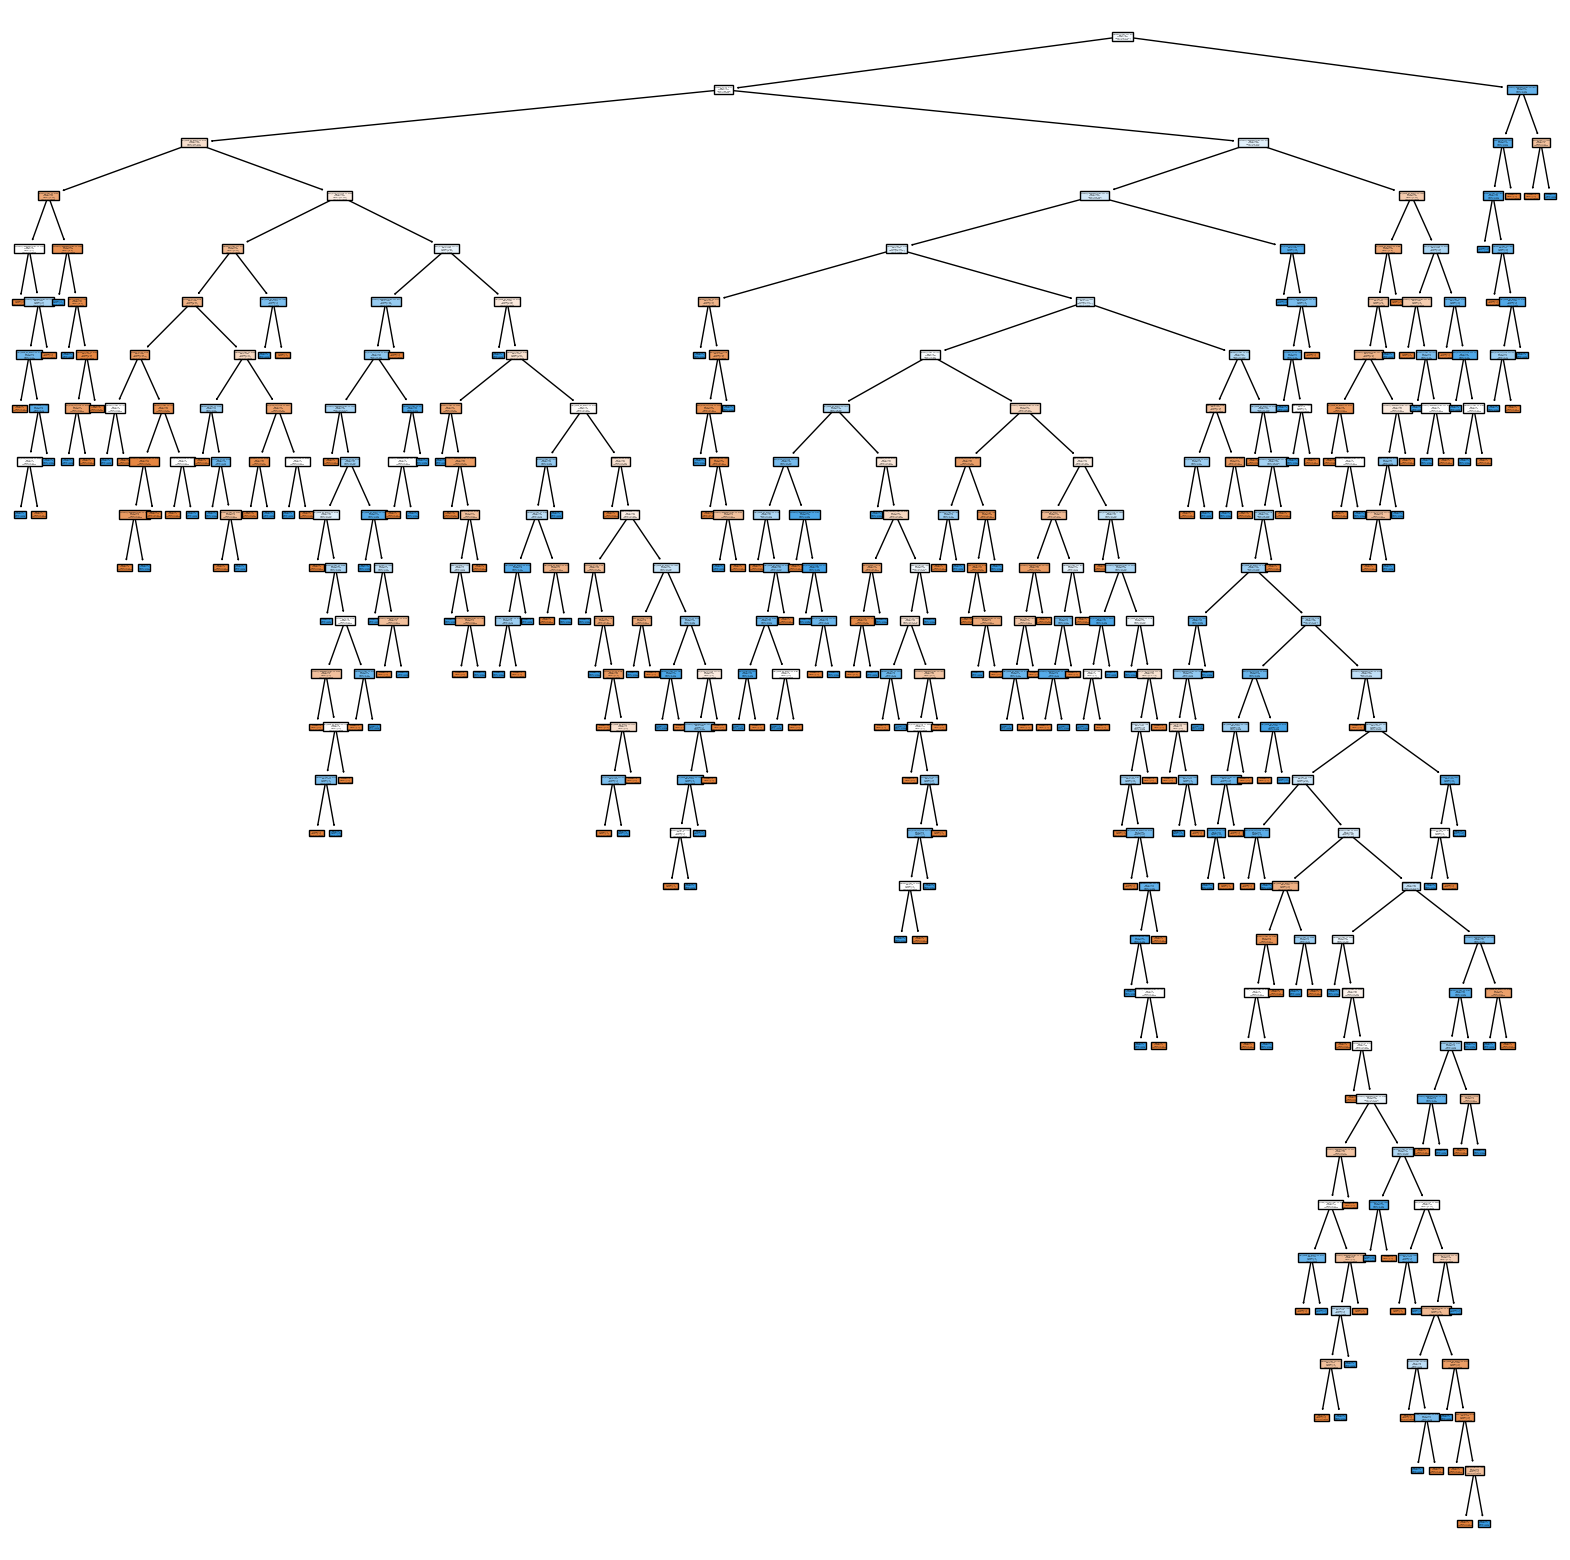

In [41]:
plt.figure(figsize=(20,20))
features = df.columns
classes = ['Not opened','opened']
tree.plot_tree(model,feature_names=features,class_names=classes,filled=True)
plt.show()

In [61]:
tree_params={'max_leaf_nodes' : list(range(15,32)),
            'min_samples_leaf':list(range(10,15))}

In [62]:
model=DecisionTreeClassifier()
gcv=GridSearchCV(estimator=model,param_grid=tree_params,scoring='roc_auc_ovr',cv=5,n_jobs=-1)
gcv.fit(X_train,Y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(), n_jobs=-1,
             param_grid={'max_leaf_nodes': [15, 16, 17, 18, 19, 20, 21, 22, 23,
                                            24, 25, 26, 27, 28, 29, 30, 31],
                         'min_samples_leaf': [10, 11, 12, 13, 14]},
             scoring='roc_auc_ovr')

In [63]:
gcv.best_params_

{'max_leaf_nodes': 26, 'min_samples_leaf': 14}

In [58]:
gcv.best_score_

0.5404002501563477

In [64]:
model_1=DecisionTreeClassifier(max_leaf_nodes=26, min_samples_leaf=14)#,min_samples_split= 23)
model_1.fit(X_train,Y_train)

DecisionTreeClassifier(max_leaf_nodes=26, min_samples_leaf=14)

In [65]:
print(classification_report(Y_train,model_1.predict(X_train)))
print(classification_report(Y_test,model_1.predict(X_test)))

              precision    recall  f1-score   support

           0       0.67      0.72      0.70       390
           1       0.72      0.66      0.69       410

    accuracy                           0.69       800
   macro avg       0.69      0.69      0.69       800
weighted avg       0.69      0.69      0.69       800

              precision    recall  f1-score   support

           0       0.51      0.64      0.57        97
           1       0.55      0.42      0.48       103

    accuracy                           0.53       200
   macro avg       0.53      0.53      0.52       200
weighted avg       0.53      0.53      0.52       200



# RandomForest

In [44]:
model_2 = RandomForestClassifier(oob_score=True)
tree_params = {'n_estimators':[100,300,500,1000],
          'min_samples_split':list(range(10,30)),
          'min_samples_leaf' :list(range(5,15))}
gcv=GridSearchCV(estimator=model_2,param_grid=tree_params,scoring='roc_auc',cv=5,n_jobs=-1)
gcv.fit(X_train,Y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(oob_score=True), n_jobs=-1,
             param_grid={'min_samples_leaf': [5, 6, 7, 8, 9, 10, 11, 12, 13,
                                              14],
                         'min_samples_split': [10, 11, 12, 13, 14, 15, 16, 17,
                                               18, 19, 20, 21, 22, 23, 24, 25,
                                               26, 27, 28, 29],
                         'n_estimators': [100, 300, 500, 1000]},
             scoring='roc_auc')

In [45]:
print(gcv.best_params_)
print(gcv.best_score_)

{'min_samples_leaf': 11, 'min_samples_split': 23, 'n_estimators': 100}
0.581488430268918


In [12]:
model_2=RandomForestClassifier(n_estimators=100,max_depth=11,min_samples_split=23,min_samples_leaf=11,oob_score=True)
model_2.fit(X_train,Y_train)

RandomForestClassifier(max_depth=11, min_samples_leaf=11, min_samples_split=23,
                       oob_score=True)

In [13]:
print(classification_report(Y_train,model_2.predict(X_train)))
print(classification_report(Y_test,model_2.predict(X_test)))

              precision    recall  f1-score   support

           0       0.83      0.79      0.81       390
           1       0.81      0.84      0.83       410

    accuracy                           0.82       800
   macro avg       0.82      0.82      0.82       800
weighted avg       0.82      0.82      0.82       800

              precision    recall  f1-score   support

           0       0.49      0.46      0.48        97
           1       0.52      0.55      0.54       103

    accuracy                           0.51       200
   macro avg       0.51      0.51      0.51       200
weighted avg       0.51      0.51      0.51       200



In [108]:
mode = RandomForestClassifier(n_estimators=200,max_features='sqrt',random_state=42)
mode.fit(X_train,Y_train)
print(classification_report(Y_train,mode.predict(X_train)))
print(classification_report(Y_test,mode.predict(X_test)))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       390
           1       1.00      1.00      1.00       410

    accuracy                           1.00       800
   macro avg       1.00      1.00      1.00       800
weighted avg       1.00      1.00      1.00       800

              precision    recall  f1-score   support

           0       0.48      0.46      0.47        97
           1       0.51      0.52      0.52       103

    accuracy                           0.49       200
   macro avg       0.49      0.49      0.49       200
weighted avg       0.49      0.49      0.49       200



# Adaboost

In [14]:
model_boost = AdaBoostClassifier(n_estimators=1000,learning_rate=0.001, random_state=42)
model_boost.fit(X_train,Y_train)

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


AdaBoostClassifier(learning_rate=0.001, n_estimators=1000, random_state=42)

In [15]:
print(classification_report(Y_train,model_boost.predict(X_train)))
print(classification_report(Y_test,model_boost.predict(X_test)))

              precision    recall  f1-score   support

           0       0.64      0.38      0.48       390
           1       0.58      0.80      0.67       410

    accuracy                           0.59       800
   macro avg       0.61      0.59      0.57       800
weighted avg       0.61      0.59      0.58       800

              precision    recall  f1-score   support

           0       0.50      0.26      0.34        97
           1       0.52      0.76      0.62       103

    accuracy                           0.52       200
   macro avg       0.51      0.51      0.48       200
weighted avg       0.51      0.52      0.48       200



# XGBoost

In [16]:
model_x=XGBClassifier(objective='binary:logistic',random_state=42,subsample=0.9,colsample_bytree=0.5,early_stopping_rounds=10,
                   eval_metric='aucpr')

In [19]:
params={'max_depth':[3,4,5],'learning_rate':[0.1,0.01,0.05],'gamma':[0,0.25,1],'reg_lambda':[0,1,10],'scale_pos_weight':[1,2,3,5]}
optimal_params=GridSearchCV(estimator=model_x,param_grid=params,scoring='roc_auc',n_jobs=-1,cv=4)

In [20]:
optimal_params.fit(X_train,Y_train,eval_set=[(X_test, Y_test)])

[0]	validation_0-aucpr:0.47630
[1]	validation_0-aucpr:0.55864
[2]	validation_0-aucpr:0.51291
[3]	validation_0-aucpr:0.51132
[4]	validation_0-aucpr:0.49376
[5]	validation_0-aucpr:0.50384
[6]	validation_0-aucpr:0.49785
[7]	validation_0-aucpr:0.51288
[8]	validation_0-aucpr:0.51014
[9]	validation_0-aucpr:0.49805
[10]	validation_0-aucpr:0.50619


GridSearchCV(cv=4,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=0.5, device=None,
                                     early_stopping_rounds=10,
                                     enable_categorical=False,
                                     eval_metric='aucpr', feature_types=None,
                                     gamma=None, grow_policy=None,
                                     importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None,...
                                     max_delta_step=None, max_depth=None,
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     multi_strategy=None, n_estimators=None,
                                     n_jobs=None, num_parallel_tree=None,
                                     random_state=42, ...),
             n_jobs=-1,
             param_grid={'gamma': [0, 0.25, 1],
                         'learning_rate': [0.1, 0.01, 0.05],
                         'max_depth': [3, 4, 5], 'reg_lambda': [0, 1, 10],
                         'scale_pos_weight': [1, 2, 3, 5]},
             scoring='roc_auc')

In [22]:
print(optimal_params.best_params_)
print(optimal_params.best_score_)

{'gamma': 0.25, 'learning_rate': 0.1, 'max_depth': 5, 'reg_lambda': 1, 'scale_pos_weight': 5}
0.5531146887240533


In [25]:
params={'max_depth':[5,6,7,8],'learning_rate':[0.1,0.3,0.5,1],'gamma':[0.25],'reg_lambda':[1],'scale_pos_weight':[5,6,7]}
optimal_params=GridSearchCV(estimator=model_x,param_grid=params,scoring='roc_auc',n_jobs=-1,cv=4)
optimal_params.fit(X_train,Y_train,eval_set=[(X_test, Y_test)])

[0]	validation_0-aucpr:0.47630
[1]	validation_0-aucpr:0.55864
[2]	validation_0-aucpr:0.51291
[3]	validation_0-aucpr:0.51132
[4]	validation_0-aucpr:0.49376
[5]	validation_0-aucpr:0.50384
[6]	validation_0-aucpr:0.49785
[7]	validation_0-aucpr:0.51288
[8]	validation_0-aucpr:0.51014
[9]	validation_0-aucpr:0.49805
[10]	validation_0-aucpr:0.50619


GridSearchCV(cv=4,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=0.5, device=None,
                                     early_stopping_rounds=10,
                                     enable_categorical=False,
                                     eval_metric='aucpr', feature_types=None,
                                     gamma=None, grow_policy=None,
                                     importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None,...
                                     max_delta_step=None, max_depth=None,
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     multi_strategy=None, n_estimators=None,
                                     n_jobs=None, num_parallel_tree=None,
                                     random_state=42, ...),
             n_jobs=-1,
             param_grid={'gamma': [0.25], 'learning_rate': [0.1, 0.3, 0.5, 1],
                         'max_depth': [5, 6, 7, 8], 'reg_lambda': [1],
                         'scale_pos_weight': [5, 6, 7]},
             scoring='roc_auc')

In [24]:
print(optimal_params.best_params_)
print(optimal_params.best_score_)

{'gamma': 0.25, 'learning_rate': 0.1, 'max_depth': 5, 'reg_lambda': 1, 'scale_pos_weight': 5}
0.5531146887240533


In [47]:
model_x=XGBClassifier(objective='binary:logistic',random_state=42,subsample=0.9,colsample_bytree=0.5,early_stopping_rounds=10,
                   eval_metric='aucpr',gamma=0.5,learning_rate= 0.1,max_depth= 5,reg_lambda=3,scale_pos_weight=1)
model_x.fit(X_train,Y_train,eval_set=[(X_test, Y_test)])

[0]	validation_0-aucpr:0.46157
[1]	validation_0-aucpr:0.51720
[2]	validation_0-aucpr:0.53438
[3]	validation_0-aucpr:0.51894
[4]	validation_0-aucpr:0.51982
[5]	validation_0-aucpr:0.51347
[6]	validation_0-aucpr:0.50364
[7]	validation_0-aucpr:0.50001
[8]	validation_0-aucpr:0.50559
[9]	validation_0-aucpr:0.50664
[10]	validation_0-aucpr:0.51112
[11]	validation_0-aucpr:0.50986
[12]	validation_0-aucpr:0.51947


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.5, device=None, early_stopping_rounds=10,
              enable_categorical=False, eval_metric='aucpr', feature_types=None,
              gamma=0.5, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=5, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=42, ...)

In [48]:
print(classification_report(Y_train,model_x.predict(X_train)))
print(classification_report(Y_test,model_x.predict(X_test)))

              precision    recall  f1-score   support

           0       0.77      0.46      0.58       390
           1       0.63      0.87      0.73       410

    accuracy                           0.67       800
   macro avg       0.70      0.66      0.65       800
weighted avg       0.70      0.67      0.66       800

              precision    recall  f1-score   support

           0       0.47      0.25      0.32        97
           1       0.51      0.74      0.60       103

    accuracy                           0.50       200
   macro avg       0.49      0.49      0.46       200
weighted avg       0.49      0.50      0.47       200



In [105]:
md = XGBClassifier()
md.fit(X_train,Y_train)
print(classification_report(Y_train,md.predict(X_train)))
print(classification_report(Y_test,md.predict(X_test)))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       390
           1       1.00      1.00      1.00       410

    accuracy                           1.00       800
   macro avg       1.00      1.00      1.00       800
weighted avg       1.00      1.00      1.00       800

              precision    recall  f1-score   support

           0       0.49      0.48      0.49        97
           1       0.52      0.52      0.52       103

    accuracy                           0.51       200
   macro avg       0.50      0.50      0.50       200
weighted avg       0.50      0.51      0.50       200



In [103]:
feature_importance=pd.Series(model_x.feature_importances_,index=model_x.feature_names_in_).sort_values(ascending=False)
feature_importance

Purchase_History             0.145874
Days_Since_Last_Open         0.138336
Customer_Engagement_Score    0.132082
Customer_Age                 0.128717
Time_Spent_On_Website        0.105181
Clicked_Previous_Emails      0.093707
Emails_Clicked               0.093565
Emails_Opened                0.081726
Device_Type                  0.080811
dtype: float32

# KNNClassifier

In [12]:
model_k =KNeighborsClassifier()
model_k.fit(X_train,Y_train)

KNeighborsClassifier()

In [13]:
print(classification_report(Y_train,model_k.predict(X_train)))
print(classification_report(Y_test,model_k.predict(X_test)))

              precision    recall  f1-score   support

           0       0.72      0.67      0.69       390
           1       0.70      0.75      0.72       410

    accuracy                           0.71       800
   macro avg       0.71      0.71      0.71       800
weighted avg       0.71      0.71      0.71       800

              precision    recall  f1-score   support

           0       0.55      0.47      0.51        97
           1       0.56      0.63      0.59       103

    accuracy                           0.56       200
   macro avg       0.55      0.55      0.55       200
weighted avg       0.55      0.56      0.55       200



In [80]:
model_k =KNeighborsClassifier()
params={'metric':['euclidean','hamming','minkowski','cosine'],'n_neighbors':np.arange(5,30)}
optimal_params=GridSearchCV(estimator=model_k,param_grid=params,scoring='roc_auc',n_jobs=-1,cv=4)
optimal_params.fit(X_train,Y_train)

GridSearchCV(cv=4, estimator=KNeighborsClassifier(), n_jobs=-1,
             param_grid={'metric': ['euclidean', 'hamming', 'minkowski',
                                    'cosine'],
                         'n_neighbors': array([ 5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21,
       22, 23, 24, 25, 26, 27, 28, 29])},
             scoring='roc_auc')

In [81]:
print(optimal_params.best_params_)
print(optimal_params.best_score_)

{'metric': 'cosine', 'n_neighbors': 27}
0.5713138335606488


In [82]:
model_k =KNeighborsClassifier(n_neighbors=27,metric='cosine')
model_k.fit(X_train,Y_train)

KNeighborsClassifier(metric='cosine', n_neighbors=27)

In [83]:
print(classification_report(Y_train,model_k.predict(X_train)))
print(classification_report(Y_test,model_k.predict(X_test)))

              precision    recall  f1-score   support

           0       0.60      0.54      0.57       390
           1       0.60      0.65      0.62       410

    accuracy                           0.60       800
   macro avg       0.60      0.60      0.60       800
weighted avg       0.60      0.60      0.60       800

              precision    recall  f1-score   support

           0       0.47      0.41      0.44        97
           1       0.50      0.56      0.53       103

    accuracy                           0.49       200
   macro avg       0.49      0.49      0.49       200
weighted avg       0.49      0.49      0.49       200



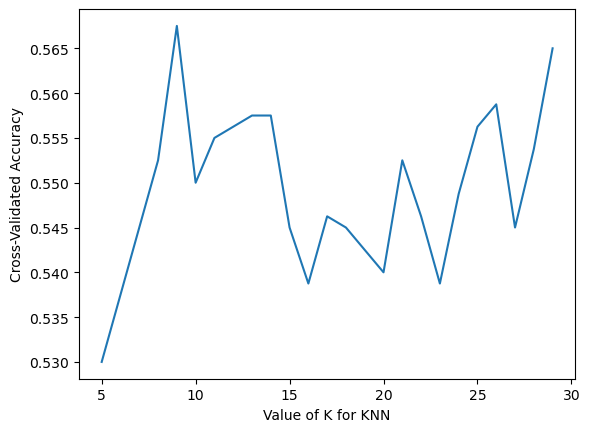

In [87]:
k_range = range(5,30)
k_scores = []
# use iteration to caclulator different k in models, then return the average accuracy based on the cross validation
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k,metric='cosine')
    scores = cross_val_score(knn,X_train,Y_train,cv=5)
    k_scores.append(scores.mean())
# plot to see clearly
plt.plot(k_range, k_scores)
plt.xlabel('Value of K for KNN')
plt.ylabel('Cross-Validated Accuracy')
plt.show()

In [97]:
model = SVC(class_weight={0:w0,1:w1},random_state=42)
params ={'C':[0.5,1,10,100],'kernel':[ 'poly','rbf'],'degree':[1,2,3,4],'gamma':[1,0.1,0.01,0.001,0.0001],'coef0':[0.5,1,2,3]}
optimal_parameters = GridSearchCV(estimator=model,param_grid=params,scoring='roc_auc',cv=2,n_jobs=-1)
optimal_parameters.fit(X_train,Y_train)# n_jobs=-1 uses all available cores on your machine.

GridSearchCV(cv=2,
             estimator=SVC(class_weight={0: 0.9322381930184805,
                                         1: 0.884990253411306},
                           random_state=42),
             n_jobs=-1,
             param_grid={'C': [0.5, 1, 10, 100], 'coef0': [0.5, 1, 2, 3],
                         'degree': [1, 2, 3, 4],
                         'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
                         'kernel': ['poly', 'rbf']},
             scoring='roc_auc')

In [98]:
print(optimal_parameters.best_params_)
print(optimal_parameters.best_score_)

{'C': 1, 'coef0': 0.5, 'degree': 3, 'gamma': 0.1, 'kernel': 'poly'}
0.5706191369606004


In [99]:
final=SVC(C=1,coef0=0.5,degree=3,kernel='poly',gamma=0.1,class_weight={0:w0,1:w1},random_state=42)
final.fit(X_train,Y_train)

SVC(C=1, class_weight={0: 0.9322381930184805, 1: 0.884990253411306}, coef0=0.5,
    gamma=0.1, kernel='poly', random_state=42)

In [100]:
print(classification_report(Y_train,final.predict(X_train)))
print(classification_report(Y_test,final.predict(X_test)))

              precision    recall  f1-score   support

           0       0.69      0.70      0.69       390
           1       0.71      0.70      0.71       410

    accuracy                           0.70       800
   macro avg       0.70      0.70      0.70       800
weighted avg       0.70      0.70      0.70       800

              precision    recall  f1-score   support

           0       0.51      0.47      0.49        97
           1       0.54      0.57      0.55       103

    accuracy                           0.53       200
   macro avg       0.52      0.52      0.52       200
weighted avg       0.52      0.53      0.52       200



# Finalising & saving model

In [6]:
x=df.iloc[:,:-1]
y=df.iloc[:,-1]

In [7]:
scale=StandardScaler()
X =scale.fit_transform(x)

In [8]:
final = KNeighborsClassifier()
final.fit(X,y)

KNeighborsClassifier()

In [17]:
print(classification_report(y,final.predict(X)))

              precision    recall  f1-score   support

           0       0.71      0.69      0.70       487
           1       0.71      0.73      0.72       513

    accuracy                           0.71      1000
   macro avg       0.71      0.71      0.71      1000
weighted avg       0.71      0.71      0.71      1000



In [18]:
dump(final,"model.pkl")

['model.pkl']

In [19]:
X[0]

array([ 0.4417513 ,  1.16858466, -0.53294956, -1.84009686, -0.83241907,
       -0.40229756, -1.05920798,  0.96462528,  0.96655883])

In [24]:
final.predict(X[0].reshape(1,-1))

array([0], dtype=int64)

In [26]:
final.predict_proba(X[0].reshape(1,-1))

array([[0.8, 0.2]])

In [25]:
import numpy as np

predictions = final.predict(X)

# Convert predictions to boolean (assuming 1 means True, 0 means False)
bool_predictions = (predictions == 1)

# Use np.where to create the desired string array
string_predictions = np.where(bool_predictions, 'Open_emails', 'Not_open')
predictions=pd.Series(string_predictions,name='predictions')
predictions

0         Not_open
1      Open_emails
2      Open_emails
3         Not_open
4         Not_open
          ...     
995    Open_emails
996       Not_open
997       Not_open
998       Not_open
999    Open_emails
Name: predictions, Length: 1000, dtype: object

In [26]:
predictions.iloc[0]

'Not_open'